Generating objects trajectories

In [8]:
import json
import numpy as np

traj_circle_r2 = []

T = 20
dt = 0.1
R = 2
w = 2*np.pi / T

ts = np.linspace(0, 2*np.pi, int(T / dt))

for t in ts:
    x = R * np.cos(t)
    y = R * np.sin(t)
    z = 0
    p = np.array([x, y, z])
    traj_circle_r2.append(p)

np.savetxt('trajectories/traj_circle_r2.txt', traj_circle_r2, delimiter=' ')


In [1]:
import numpy as np

traj_linear_right_down_diag = []

dt = 0.1

for i in range(1000):
    x = 0.7 * i * dt
    y = -0.7 * i * dt + 20
    z = 0
    traj_linear_right_down_diag.append(np.array([x, y, z, 0, 0, 0]))

np.savetxt('trajectories/traj_linear_right_down_diag.txt', traj_linear_right_down_diag, delimiter=' ')

In [13]:
import numpy as np
import pickle

trajs_linear = []

duration = 150
x_start = 2
z_start = 0
y_max = 150
y_step = 10

speeds = [1, 2]
a = 0.5
T = 2
w = 2 * np.pi / T

for y_start in np.arange(0, 150, 10):
    print('processing: ' + str(int(100 * y_start / 150)))
    y_arr = []
    for theta in np.linspace(0, np.pi / 2, 10):
        theta_arr = []
        for phi in np.linspace(0, np.pi / 2, 10):
            phi_arr = []
            for v in speeds:
                v_arr = []
                for t in np.arange(0, 10, 0.1):
                    x = x_start + v * t * np.cos(phi) * np.cos(theta)
                    y = y_start - v * t * np.cos(phi) * np.sin(theta)
                    z = -1 - v * t * np.sin(phi) + a * np.sin(w*t)
                    roll = -theta
                    pitch = -phi + np.arctan2(a, T/4) * np.cos(w*t)
                    yaw = 0
                    point = np.array([x, y, z, roll, pitch, yaw])
                    v_arr.append(point)
                phi_arr.append(v_arr)
            theta_arr.append(phi_arr)
        y_arr.append(theta_arr)
    trajs_linear.append(y_arr)

pickle.dump(trajs_linear, open('trajectories/curvilinear/trajs_curvilinear.bin', 'wb'))

processing: 0
processing: 6
processing: 13
processing: 20
processing: 26
processing: 33
processing: 40
processing: 46
processing: 53
processing: 60
processing: 66
processing: 73
processing: 80
processing: 86
processing: 93


In [15]:
trajs_spline = []

for x0 in np.arange(0, 150, 10):
    print('processing: ' + str(int(100 * x0 / 150)) + '%')
    x_arr = []
    for y0 in np.arange(0, 150, 10):
        y_arr = []
        for r in np.arange(5, 75, 5):
            if x0**2 + y0**2 <= 150**2 + r**2:
                r_arr = []
                z0 = np.random.uniform(-1, -5)
                az = np.random.uniform(0, -z0)
                phi_z = np.random.uniform(0, 2*np.pi)

                for v in np.arange(5, 20, 5):
                    v_arr = []
                    for t in np.arange(0, 2 * np.pi * r / v, 0.1):
                        theta = t * v / r
                        x = x0 + r * np.cos(theta)
                        y = y0 + r * np.sin(theta)
                        z = z0 + az * np.sin(theta + phi_z)
                        roll = theta
                        pitch = theta * np.cos(theta + phi_z)
                        yaw = 0
                        point = np.array([x, y, z, roll, pitch, yaw])
                        v_arr.append(point)

                    r_arr.append(v_arr)
                y_arr.append(r_arr)
        
        x_arr.append(y_arr)
    trajs_spline.append(x_arr)

print('Done. Saving to dump...')
pickle.dump(trajs_spline, open('trajectories/spline/trajs_spline.bin', 'wb'))
print('finished')

processing: 0%
processing: 6%
processing: 13%
processing: 20%
processing: 26%
processing: 33%
processing: 40%
processing: 46%
processing: 53%
processing: 60%
processing: 66%
processing: 73%
processing: 80%
processing: 86%
processing: 93%
Done. Saving to dump...
finished


Other purposes

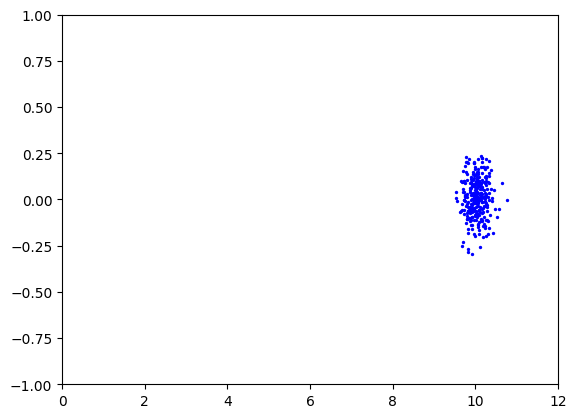

In [47]:
import numpy as np
import matplotlib.pyplot as plt

meas = []

for i in range(300):
    r = 10 + np.random.normal(0, 0.2)
    theta = np.random.normal(0, 0.01)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.scatter(x, y, s=2, color='blue')

plt.axis([0, 12, -1, 1])
plt.show()

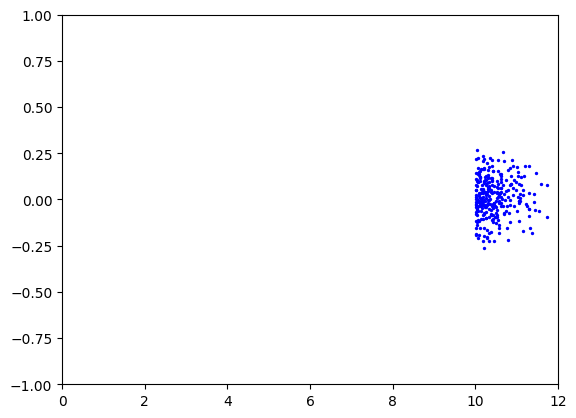

In [60]:
for i in range(300):
    r = 10 + np.random.exponential(0.5, 1)
    theta = np.random.normal(0, 0.01)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.scatter(x, y, s=2, color='blue')

plt.axis([0, 12, -1, 1])
plt.show()

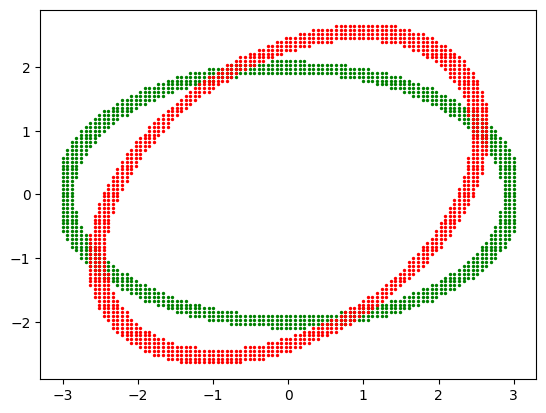

In [3]:
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

a = 3
b = 2

def rotate(A, angle):
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])
    
    return R @ A @ R.T


def check(A, p):
    return abs(p.T @ A @ p - 1) <= 0.1


A = np.array([[1/a**2, 0],
              [0, 1/b**2]])

A_new = rotate(A, np.pi / 4)

for i in np.linspace(-3, 3, 100):
    for j in np.linspace(-3, 3, 100):
        if check(A, np.array([i, j])):
            plt.scatter(i, j, s=2, color='green')
        if check(A_new, np.array([i, j])):
            plt.scatter(i, j, s=2, color='red')

plt.show()





Trajectory test visualizer

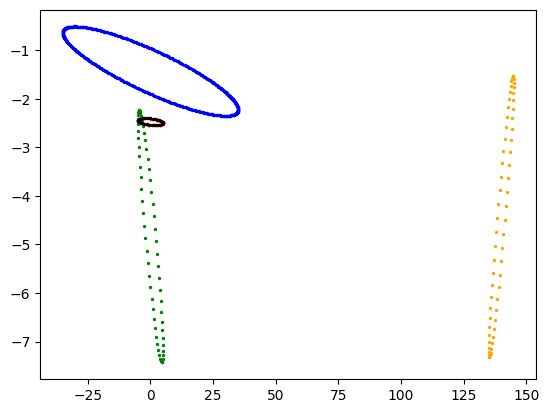

In [35]:
import matplotlib.pyplot as plt

trajs = pickle.load(open('trajectories/spline/trajs_spline.bin', 'rb'))

traj = trajs[0][0][0][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='red')

traj = trajs[14][0][0][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='orange')

traj = trajs[0][7][0][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='green')

traj = trajs[0][8][6][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='blue')

traj = trajs[0][0][0][1]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='black')

plt.show()

number on points: 15800
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progre

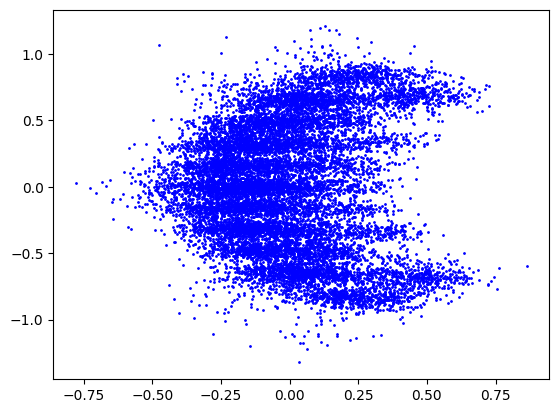

In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/sphere_angle_1.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 1800
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

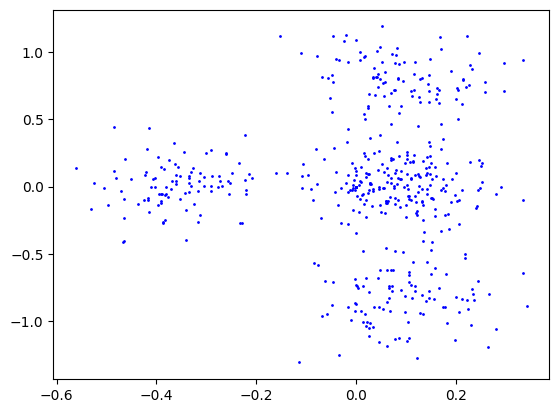

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/sphere_angle_5.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 4956
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

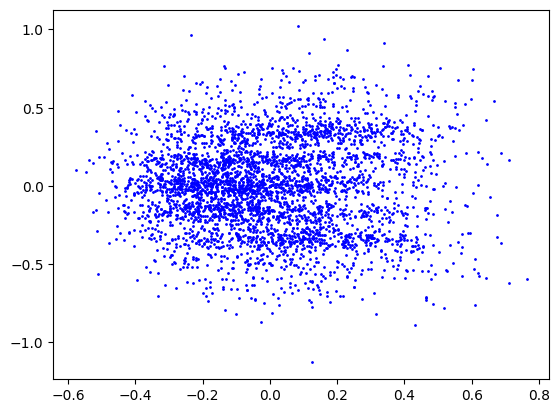

In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/human_angle_1.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 1408
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

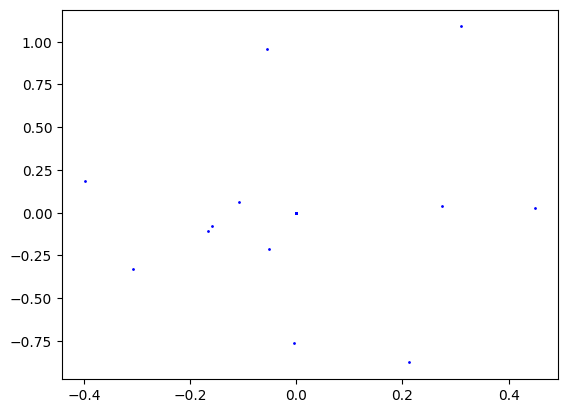

In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/human_angle_5.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 23985
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progre

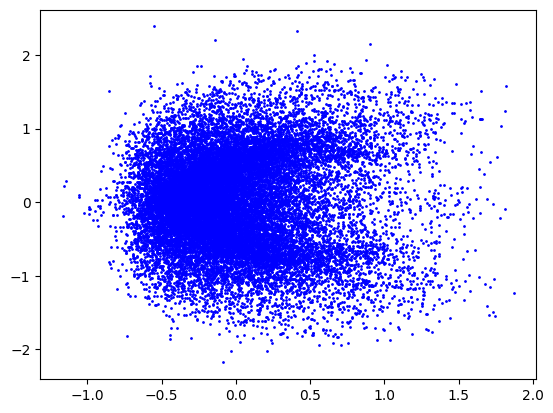

In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/dolphin_angle_1.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 1980
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

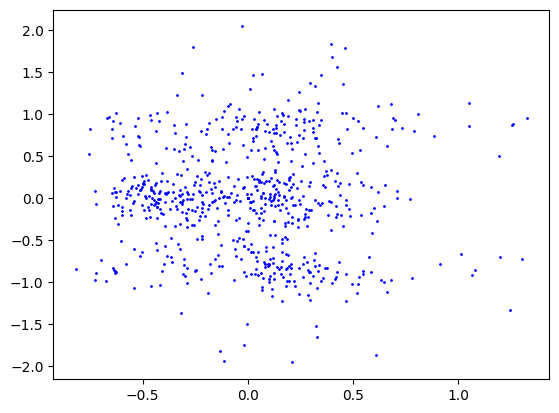

In [9]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/dolphin_angle_5.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

In [11]:
mat = np.array([1, 2, 3])
mat[0:2]

array([1, 2])